In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

In [4]:
# Loading MNIST data

from six.moves import urllib
from sklearn.datasets import fetch_mldata
import requests
requests.packages.urllib3.disable_warnings()

"""
Adapted from the Github repo:
https://github.com/ageron/handson-ml
for the 03_classification notebook.
This implementation uses the 'requests' package instead of URLLIB
"""

try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = requests.get(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.content
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

In [5]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [7]:
X, Y = mnist["data"], mnist["target"]

In [68]:
X.shape

(70000, 784)

In [9]:
Y.shape

(70000,)

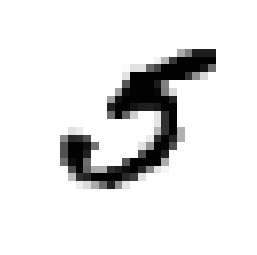

In [16]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [19]:
Y[36000]
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [41]:
# Separating into test and train sets

X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [42]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

In [43]:
Y_train[36000]

8.0

In [44]:
Y_train_5 = (Y_train==5)
Y_test_5 = (Y_test==5)

In [45]:
Y_train_5[36000]

False

In [46]:
#SGD binary classifier (fitting and prediction)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state = 42)
sgd_clf.fit(X_train, Y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [48]:
sgd_clf.predict([X_train[36000]])

array([False])

In [49]:
#Accuracy: Cross-validation of SGD binary classifier

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, Y_train_5, cv=3, scoring="accuracy")

array([0.9656 , 0.9616 , 0.96485])

In [54]:
#Confusion Matrix: Precision & Recall

from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train_5, Y_train_pred)

array([[53958,   621],
       [ 1538,  3883]])

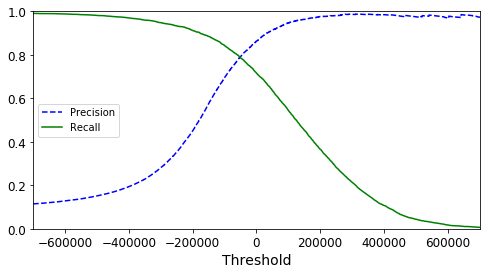

In [75]:
#Precision & Recall for all trains

Y_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train_5, Y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.axis([-700000,700000,0,1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [76]:
# Scores (Precision & Recall) by thresholds

from sklearn.metrics import precision_score, recall_score

Y_train_predic_90 = (Y_scores > 70000)

precision_score(Y_train_5, Y_train_predic_90)

0.9264747791393559

In [77]:
recall_score(Y_train_5, Y_train_predic_90)

0.5997048515034127

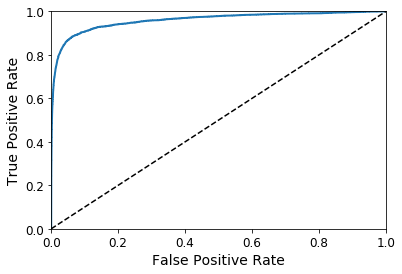

In [78]:
#ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(Y_train_5, Y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [79]:
#Area Under Curve

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train_5, Y_scores)

0.9593609528614967

In [80]:
# Multiclass classifier  

sgd_clf.fit(X_train, Y_train)
sgd_clf.predict([some_digit])

array([5.])

In [82]:
# It trained 10 binary classifier for each number

some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-218408.21143338, -434022.90315745, -397993.35066636,
        -132835.10761829, -327312.03708386,  -36529.82485687,
        -649170.66748329,  -63471.46341159, -655334.26806398,
        -620161.34316686]])

In [83]:
np.argmax(some_digit_scores)

5

In [87]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [89]:
#Random Forest Classifier (multi-class classifier)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,Y_train)
forest_clf.predict([some_digit])

array([5.])

In [90]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [91]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.8429814 , 0.86779339, 0.8706806 ])

In [92]:
cross_val_score(forest_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.93991202, 0.94104705, 0.94524179])

In [93]:
# Scaling inputs

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scale = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scale, Y_train, cv=3, scoring="accuracy")

array([0.90986803, 0.90899545, 0.90963645])

In [94]:
  #Scaling doesn't help RandomForest
cross_val_score(forest_clf, X_train_scale, Y_train, cv=3, scoring="accuracy")

array([0.93996201, 0.94104705, 0.94519178])

In [96]:
#Errors for multiclass
Y_train_pred = cross_val_predict(sgd_clf, X_train_scale, Y_train, cv=3)
conf_mx = confusion_matrix(Y_train, Y_train_pred)
conf_mx

array([[5740,    2,   24,   10,   10,   42,   44,    9,   39,    3],
       [   1, 6470,   49,   27,    6,   39,    8,   15,  118,    9],
       [  63,   33, 5341,   94,   78,   24,   94,   61,  157,   13],
       [  47,   42,  138, 5352,    3,  226,   35,   55,  134,   99],
       [  21,   26,   37,    6, 5341,    9,   52,   37,   90,  223],
       [  64,   45,   32,  188,   75, 4592,  121,   40,  178,   86],
       [  35,   22,   48,    2,   38,   94, 5621,    9,   49,    0],
       [  22,   18,   66,   34,   51,   10,    6, 5851,   15,  192],
       [  52,  142,   69,  157,   16,  157,   58,   30, 5024,  146],
       [  43,   30,   25,   91,  163,   33,    2,  248,   76, 5238]])

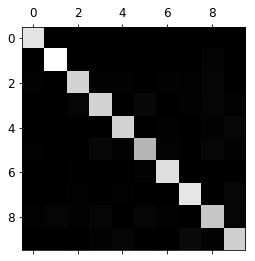

In [98]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [105]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[183],
       [272],
       [617],
       [779],
       [501],
       [829],
       [297],
       [414],
       [827],
       [711]])

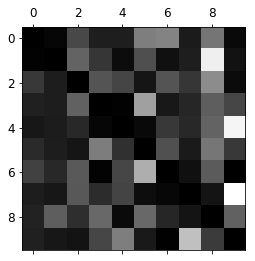

In [107]:
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()